## BME i9400
## Fall 2024
### Logistic Regression

## Motivation
- Imagine that we would like to build a machine learning model for classifying MRI images of the brain into two categories: images showing a benign tumor versus images showing a malignant tumor.
- In this case, the target $y$ is binary, and its value is either 0 or 1: $y \in \{0, 1\}$.
- The features $x$ are the pixel values of the MRI image (organized in a vector).
- How do we map the features $x$ to the target $y$?

## Logistic Regression
- We could use a linear regression model to predict the target $y$.
- But this is not an optimal approach: why?

## Logistic Regression (cont'd)
- A better solution is to learn the probability that the target $y$ is 1 given the features $x$
---
<center> $p(y=1|x) = \sigma(x)$ </center>

---

- where $\sigma(x)$ is the sigmoid function:

---
<center> $\sigma(x) = \frac{1}{1 + e^{-x}}$ </center>

---

## Sigmoid function
- Let's plot the sigmoid function $\sigma(x)$.

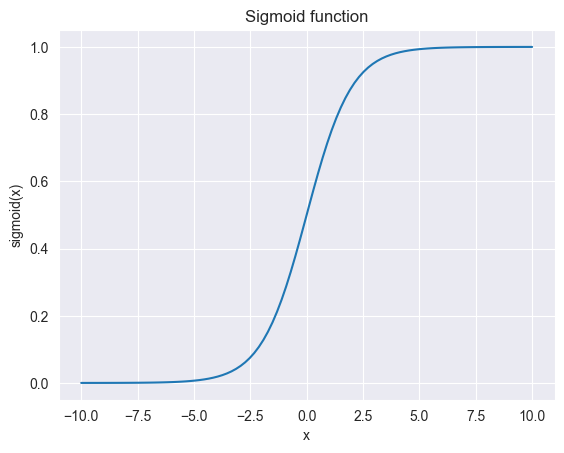

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid function')
plt.show()

## Fun fact about the sigmoid function
- We know that $p(y=0|x) = 1 - p(y=1|x)$.
- Therefore, we can write the probability that the target $y$ is 0 given the features $x$ as follows:
- $p(y=0|x) = 1 - p(y=1|x) = 1 - \sigma(x) = 1 - \frac{1}{1 + e^{-x}} = \frac{e^{-x}}{1 + e^{-x}} = \frac{1}{1 + e^{x}}$
- Therefore, we have that 
---
<center> $p(y=0|x) = \sigma(-x)$ </center>

---

## Let's plot the sigmoid function and its mirror image

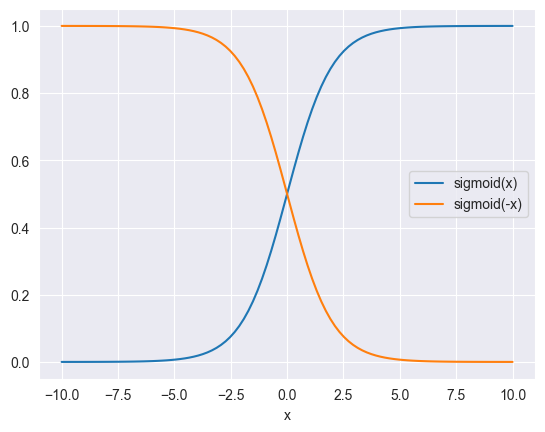

In [2]:
y_0 = sigmoid(-x)
plt.plot(x, y, label='sigmoid(x)')
plt.plot(x, y_0, label='sigmoid(-x)')
plt.xlabel('x')
plt.legend()

## Sigmoid function (cont'd)
- The sigmoid function maps any real number $x$ to the interval $[0, 1]$.
- Therefore, we can interpret the output of the sigmoid function as a probability.
- For example, if $\sigma(x) = 0.9$, we can interpret this as a 90% probability that the target $y$ is 1 given the features $x$.

## Logistic Regression model
- The logistic regression model is defined as follows:
--- 
### <center> $p(y=1|x) = \sigma(w^T x) = \frac{1}{1 + e^{-w^T x}}$ </center>
---
- where $w$ is the weight vector and $x$ is the feature vector (includes a constant term).
- When $w^T x >> 0$, we have that $p(y=1|x) \approx 1$.
- When $w^T x << 0$, we have that $p(y=1|x) \approx 0$.
- When $w^T x = 0$, we have that $p(y=1|x) = 0.5$.
- The linear dot product $w^Tx$ thus captures how likely the target $y$ is 1 given the features $x$.

## Example: benign vs. malignant tumor classification
- $y = \left\{ \begin{array}{ll} 0 & \mbox{benign tumor} \\ 1 & \mbox{malignant tumor} \end{array} \right.$
- $x = \left[ \begin{array}{c} 1 \\ x_1 \\ x_2 \\ x_3 \end{array} \right] = \left[ \begin{array}{c} \mbox{constant} \\ \mbox{tumor size} \\ \mbox{tumor brightness} \\ \mbox{tumor asymmetry} \end{array} \right]$
- $w = \left[ \begin{array}{c} w_0 \\ w_1 \\ w_2 \\ w_3 \end{array} \right]$
- $p(y=1|x) =  \sigma(w^T x) = \sigma(w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3)$

## Objective of logistic regression model
- Our job is to find the weight vector $w$ that best discriminates benign and malignant tumors.
- If the tumor is benign, we would like to have $p(y=1|x) \approx 0$.
- If the tumor is malignant, we would like to have $p(y=1|x) \approx 1$.
- How do we formulate this mathematically?


## Cross-entropy loss function
- Define our estimate of the probability of a malignant tumor as:
---
<center> $\hat{y} = \sigma(w^T x)$. </center>

---

- Next consider the probability of the correct class:
---
<center> $ p(y|x) = \hat{y}^y (1 - \hat{y})^{1-y}$ </center>

---
- Notice that when $y=1$, we are left with $\hat{y}$: this is the model's estimate of the probability of a malignant tumor
- When $y=0$, we are left with $1 - \hat{y}$: this is the model's estimate of the probability of a benign tumor. 
- Therefore, **we want to maximize this quantity.**


## Cross-entropy loss function (cont'd)
- To put this into the framework of loss functions (which we *minimize*), we can take the negative log of the probability:
---
<center> $L(w) = - \log(p(y|x)) = - y \log(\hat{y}) - (1 - y) \log(1 - \hat{y})$ </center>

---
- The log operation is used to make the loss function easy to differentiate.
- The negative sign is used to make the loss function a minimization problem.

## Cross-entropy loss function (cont'd)

- Across the training set $\mathcal{D} = \{(x^{(1)}, y^{(1)}), \ldots, (x^{(n)}, y^{(n)})\}$, the total loss is:
---
<center> $L(w) = - \sum_{i=1}^n y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})$ </center>

---
- Now we can use gradient descent to minimize this loss function.
- It can be shown that the gradient of the loss function is:
- $\nabla_w L(w) = \sum_{i=1}^n (\hat{y}^{(i)} - y^{(i)}) x^{(i)}$
- or:
- $\nabla_w L(w) = \sum_{i=1}^n \left( \sigma(w^T {x}^{(i)}) - y^{(i)} \right) x^{(i)}$

## Multinomial logistic regression
- The logistic regression model can be extended to the case where the target $y$ can take on more than two values.
- In this case, the target $y$ is a categorical variable: $y \in \{1, 2, \ldots, K\}$, where $K$ is the number of categories.
- Before presenting the model, we need to introduce the *softmax* function.

## Softmax function
- The softmax function is a generalization of the sigmoid function to the case where the target $y$ can take on more than two values.
- For a vector $z \in \mathbb{R}^K$, the softmax function is defined as follows:
---
<center> $\mathrm{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$ </center>

---
- The softmax function maps a vector $z$ to a probability distribution over $K$ classes
    - The values of the softmax function sum to 1, with the larger values being pushed towards 1 (hence the term "soft").

## Example softmax calculation
- Let's demonstrate how the softmax function works with Python code.

In [3]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

z = np.array([1, -2, 3, 5])
softmax(z)

array([1.58637008e-02, 7.89807157e-04, 1.17217775e-01, 8.66128717e-01])

## Example: breast cancer dataset
- First let's import the required libraries.

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Dataset
- We will use the breast cancer dataset from scikit-learn.
- This dataset contains features computed from digitized images of breast cancer biopsies.
- The target is binary: 0 for benign tumors and 1 for malignant tumors.
- We will use the logistic regression model to classify the tumors.

## Load and inspect the dataset

In [5]:
data = load_breast_cancer()
X = data['data']
y = data['target']
X.shape, y.shape

((569, 30), (569,))

## How many features are we predicting from?

## Calculate the prevalence malignant tumors

In [6]:
np.mean(y)

np.float64(0.6274165202108963)

## Split the dataset into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

## Create and train the logistic regression model

In [8]:
# Create model object
model = LogisticRegression(max_iter=10000)

# Fit the model on our training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Make predictions on the test data

In [9]:
y_pred = model.predict(X_test)

# get the model predicted probabilities
y_prob = model.predict_proba(X_test)

# print out the first 10 predictions and probabilities
y_pred[:10], y_prob[:10]

(array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1]),
 array([[1.38750612e-01, 8.61249388e-01],
        [9.99999953e-01, 4.71554882e-08],
        [9.98229677e-01, 1.77032297e-03],
        [1.28214896e-03, 9.98717851e-01],
        [2.30039677e-04, 9.99769960e-01],
        [1.00000000e+00, 1.97984655e-10],
        [1.00000000e+00, 6.29806681e-11],
        [9.81016026e-01, 1.89839736e-02],
        [1.99163675e-02, 9.80083632e-01],
        [5.95187084e-03, 9.94048129e-01]]))

## Compute the accuracy

In [10]:
acc = np.mean(y_pred == y_test)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.98


## Compute the confusion matrix

In [11]:
cm = np.zeros((2, 2))
for i in range(len(y_test)):
    cm[y_test[i], y_pred[i]] += 1
    

<Axes: >

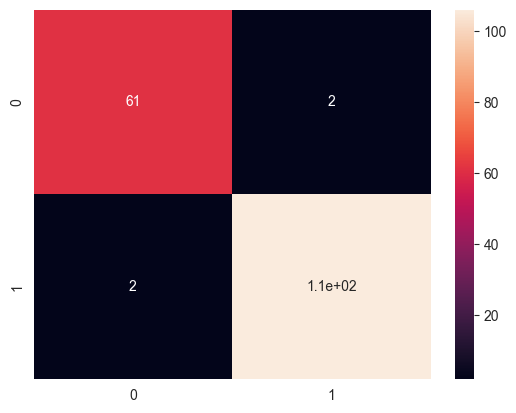

In [12]:
import seaborn
seaborn.heatmap(cm, annot=True)

## Multinomial logistic regression model
- The multinomial logistic regression model is defined as follows:
---
### <center> $\hat{p}(y=k|x) = \mathrm{softmax}(w_k^T x) = \frac{e^{w_k^T x}}{\sum_{j=1}^K e^{w_j^T x}}$ </center>

---
- where $w_k$ is the weight vector for class $k$.
- Note that we have $K$ weight vectors, **one for each class.**

## Cross-entropy loss function for multiple classes
- The cross-entropy loss function for the multinomial logistic regression model is:
---
### <center> $L(w) = - \sum_{k=1}^K y_k \log \hat{p}(y=k|x) $ </center>
---
- where $y_k$ is the $k$th entry of the one-hot encoded target vector $y$:

---
<center> $y = \left[ \begin{array}{c} 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{array} \right]$ </center>

---
- where the 1 is in the $k$th position.


## Cross-entropy loss function for multiple classes (cont'd)
---
<center> $L(w) = - \sum_{k=1}^K \mathbb{1}(y=k) \log \hat{p}(y=k|x) $ </center>

---

- where $\mathbb{1}(y=k)$ is the indicator function that is 1 when $y=k$ and 0 otherwise.

- Now we can reduce the loss function to:
---
<center> $L(w) = -\log \hat{p}(y=k|x) $ </center>

---
- because the indicator function will be zero everywhere except for the $k$th value of $\mathbb{1}(y=k)$.
- Notice that the loss is equal to the negative of the log probability.
- This is often called the negative log likelihood function. 
- We can use gradient descent to minimize this loss function on the training set.